# Brain Tumor Classification

<center>
    <figure>
        <img src="https://cdn-images-1.medium.com/max/800/1*f1sodi17fNcObGBmIKgGGQ.gif" alt ="Brain Tumor MRI" style='width:55%;'>
    </figure>
</center>

## Data Preprocessing

In [1]:
import os
import pandas as pd

data_directory = "..//input/brain-tumor-mri-images-44c"
file_paths = []
labels = []

folds = os.listdir(data_directory)
for fold in folds:
    fold_path = os.path.join(data_directory, fold)
    file_list = os.listdir(fold_path)
    for file in file_list:
        file_path = os.path.join(fold_path, file)
        file_paths.append(file_path)
        fold = str(fold).replace('C+', '')
        labels.append(fold[:-3])

file_paths_series = pd.Series(file_paths, name='filepaths')
labels_series = pd.Series(labels, name='labels')
df = pd.concat([file_paths_series, labels_series], axis=1)

df.head()

,filepaths,labels
0,..//input/brain-tumor-mri-images-44c/Papiloma ...,Papiloma
1,..//input/brain-tumor-mri-images-44c/Papiloma ...,Papiloma
2,..//input/brain-tumor-mri-images-44c/Papiloma ...,Papiloma
3,..//input/brain-tumor-mri-images-44c/Papiloma ...,Papiloma
4,..//input/brain-tumor-mri-images-44c/Papiloma ...,Papiloma


## Model

In [2]:
from fastai.vision.all import *
from fastai.vision import models
from fastai.metrics import accuracy, F1Score

set_seed(42)

dls = ImageDataLoaders.from_df(df, fn_col=0, label_col=1, valid_pct=0.2, 
                               folder='', item_tfms=Resize(224))

## View Batch

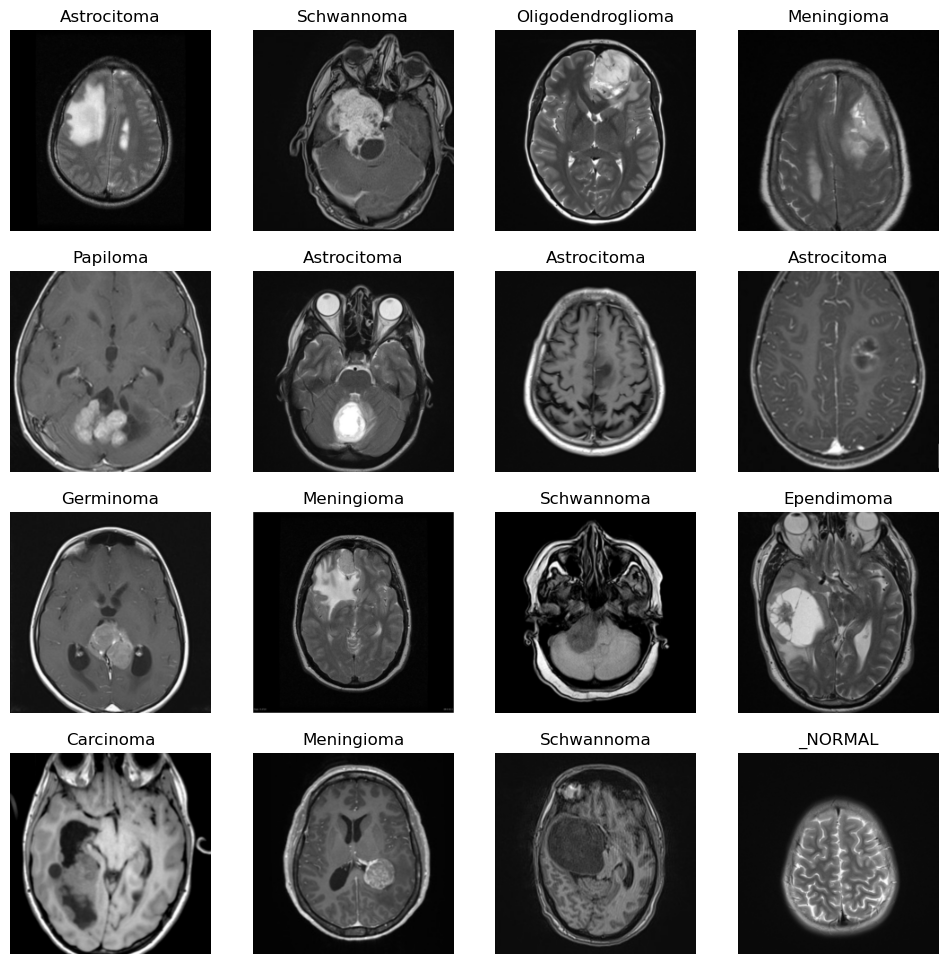

In [3]:
dls.show_batch(max_n=16)

## Vision Learner

In [4]:
learn = vision_learner(dls, 'efficientnet_b3', metrics=[accuracy], path='.').to_fp16()
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 40 x 112 x 112 
Conv2d                                    1080       False     
Identity                                                       
SiLU                                                           
Conv2d                                    360        False     
Identity                                                       
SiLU                                                           
____________________________________________________________________________
                     64 x 10 x 1 x 1     
Conv2d                                    410        False     
SiLU                                                           
____________________________________________________________________________
                     64 x 40 x 1 x 1     
Conv2d                                    440        False     
Sigmoid                            

## Train Model

In [5]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,3.768795,2.560997,0.234637,00:55
1,2.707226,1.428415,0.581006,00:53
2,1.842344,1.056102,0.682682,00:54
3,1.290024,0.930675,0.717318,00:53
4,0.950182,0.748981,0.764246,00:53
5,0.706029,0.698061,0.791061,00:54
6,0.541718,0.638513,0.806704,00:53
7,0.432999,0.541050,0.834637,00:53
8,0.322850,0.527619,0.833520,00:54
9,0.266013,0.495244,0.846927,00:53


## See Results

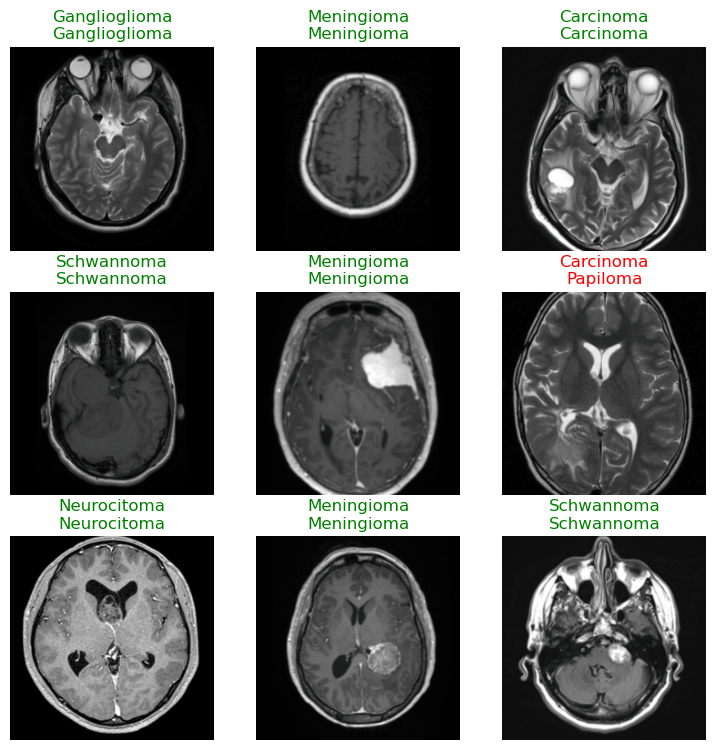

In [6]:
learn.show_results()

## Save Model

In [7]:
learn.export('/kaggle/working/brain_tumor.pkl')

## Classification Interpretation Learned Weights

In [8]:
classification_interp = ClassificationInterpretation.from_learner(learn)

## Plot Top Lossy Classes

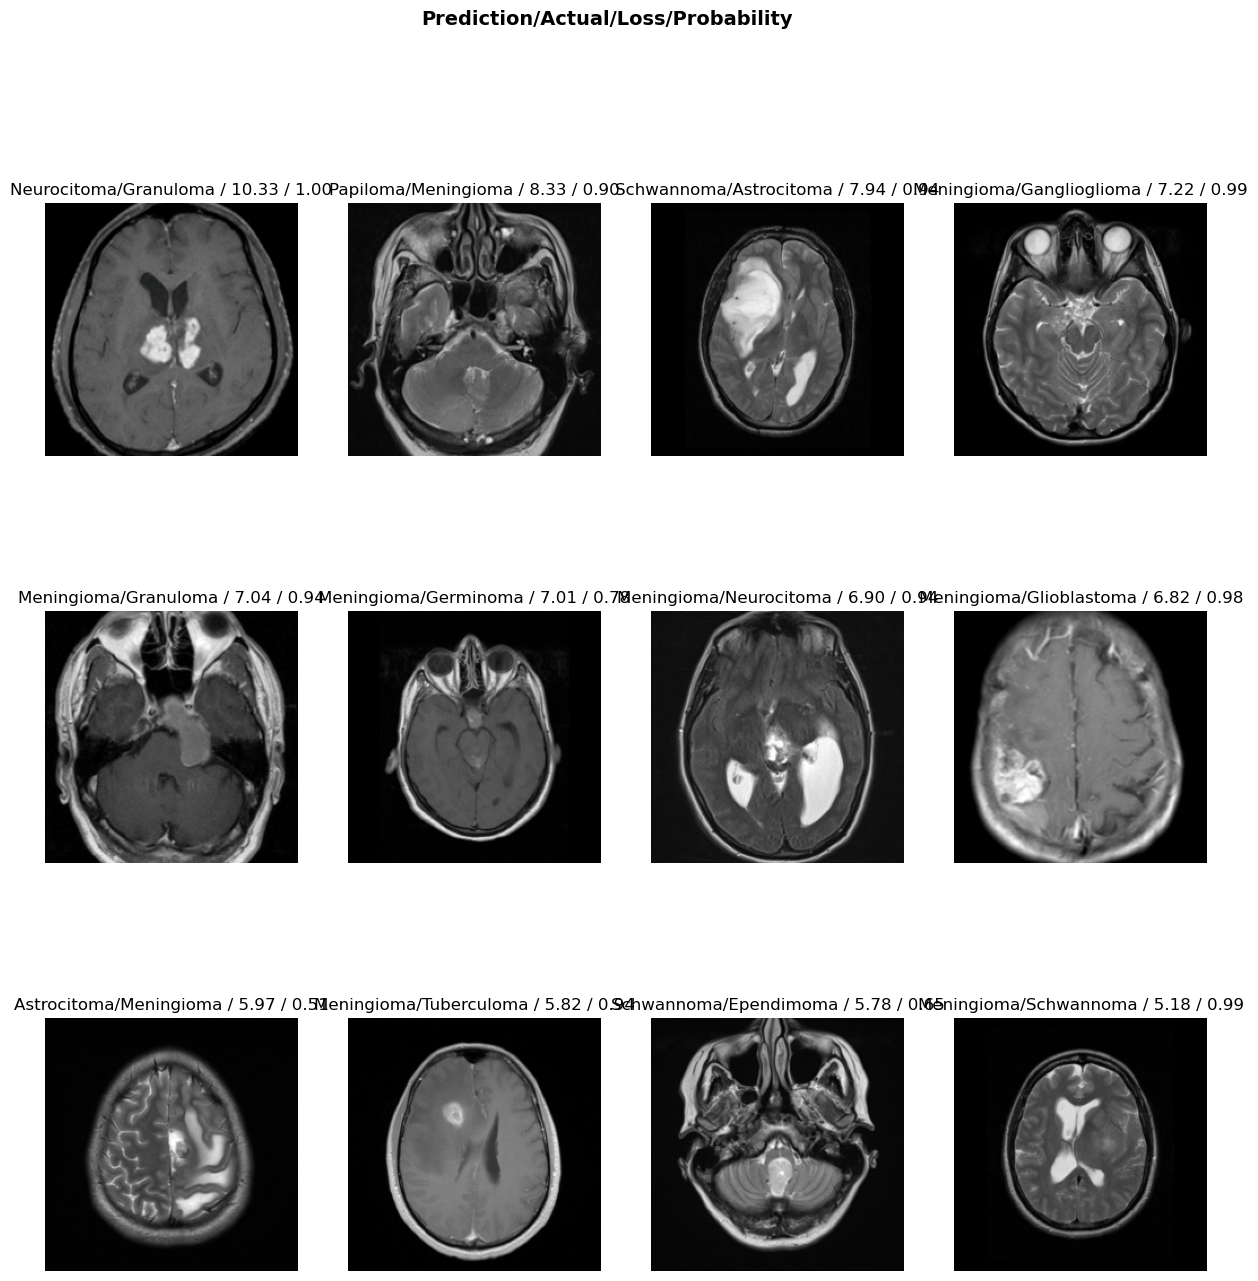

In [9]:
classification_interp.plot_top_losses(12, figsize=(15, 15))

## Confusion Matrix

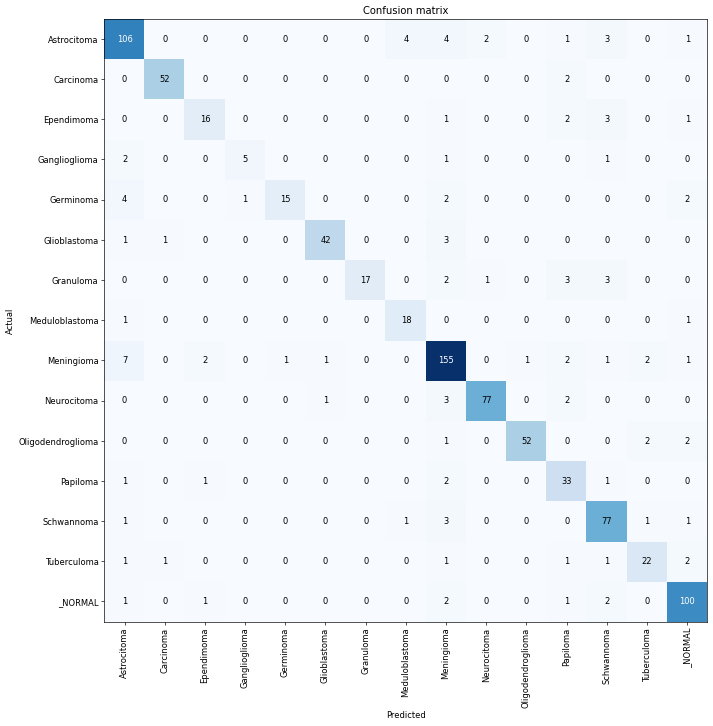

In [10]:
classification_interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)